# Predicting Air Quality in Hetauda Using Machine Learning
This project aims to predict the Air Quality Index (AQI) using meteorological data. We will explore two models: Linear Regression and a Neural Network, and compare their performance.

**Author:** Anmol Lamichhane

**Co-Author:** Bibek Pokhrel, Anish Sunar

This notebook covers the data collection, cleaning, and exploratory data analysis for the project.


In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading and Preparing the Data
First, we'll load the two datasets: one for weather and one for air quality.

In [128]:
df1 = pd.read_csv("../data/raw/hetauda-raw-weather-parameters.csv")
df2 = pd.read_csv("../data/raw/hetauda-raw-air-quality.csv")

In [129]:
df1.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),wind_speed_10m_mean (km/h),surface_pressure_mean (hPa),dew_point_2m_mean (°C),relative_humidity_2m_mean (%)
0,1/1/2022,19.4,8.9,4.2,965.5,9.3,76
1,1/2/2022,20.4,7.8,4.1,963.8,8.5,73
2,1/3/2022,20.4,9.0,4.6,962.5,8.7,72
3,1/4/2022,19.6,8.8,4.1,963.2,9.4,73
4,1/5/2022,20.3,9.3,4.2,963.0,10.2,72


In [130]:
df2.head()

,date,pm25,pm10
0,2025/8/1,36,13
1,2025/8/2,44,14
2,2025/8/3,49,
3,2025/7/1,36,9
4,2025/7/2,29,10


## 2. Data Preparation and Merging
The raw datasets require alignment before they can be merged.

* The air quality data is in reverse order, so we'll flip it.
* The date columns have different names ('time' and 'date'), so we'll make them consistent.
* We'll convert both date columns to a standard format so they can be matched properly.

In [131]:
df2_reversed = df2.iloc[::-1]

In [132]:
df2_reversed.head()

,date,pm25,pm10
906,2021/12/27,,23
905,2022/3/30,,20
904,2022/9/28,,5
903,2022/9/16,,4
902,2022/9/7,,6


In [133]:
df2_reversed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 906 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    907 non-null    object
 1    pm25   907 non-null    object
 2    pm10   907 non-null    object
dtypes: object(3)
memory usage: 21.4+ KB


In [134]:
df1.rename(columns={'time': 'date'}, inplace=True)

In [135]:
df2_reversed['date'] = pd.to_datetime(df2_reversed['date'])
df1['date'] = pd.to_datetime(df1['date'])

In [136]:
df1.info()
df2_reversed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           1309 non-null   datetime64[ns]
 1   temperature_2m_max (°C)        1309 non-null   float64       
 2   temperature_2m_min (°C)        1309 non-null   float64       
 3   wind_speed_10m_mean (km/h)     1309 non-null   float64       
 4   surface_pressure_mean (hPa)    1309 non-null   float64       
 5   dew_point_2m_mean (°C)         1309 non-null   float64       
 6   relative_humidity_2m_mean (%)  1309 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 71.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 906 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    907 non-null    

In [137]:
df1.head()

,date,temperature_2m_max (°C),temperature_2m_min (°C),wind_speed_10m_mean (km/h),surface_pressure_mean (hPa),dew_point_2m_mean (°C),relative_humidity_2m_mean (%)
0,2022-01-01,19.4,8.9,4.2,965.5,9.3,76
1,2022-01-02,20.4,7.8,4.1,963.8,8.5,73
2,2022-01-03,20.4,9.0,4.6,962.5,8.7,72
3,2022-01-04,19.6,8.8,4.1,963.2,9.4,73
4,2022-01-05,20.3,9.3,4.2,963.0,10.2,72


In [138]:
df2_reversed.head()

,date,pm25,pm10
906,2021-12-27,,23
905,2022-03-30,,20
904,2022-09-28,,5
903,2022-09-16,,4
902,2022-09-07,,6


### Merging the Datasets
Now we'll merge the two tables into one. We use an **outer join** to make sure we keep every single date from both files. This will place `NaN` where data is missing, giving us a complete picture.

In [139]:
df_raw_merged = pd.merge(df1,df2_reversed,how='outer',on='date')

In [140]:
df_raw_merged.columns

Index(['date', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'wind_speed_10m_mean (km/h)', 'surface_pressure_mean (hPa)',
       'dew_point_2m_mean (°C)', 'relative_humidity_2m_mean (%)', ' pm25',
       ' pm10'],
      dtype='object')

In [141]:
df_raw_merged.head()

,date,temperature_2m_max (°C),temperature_2m_min (°C),wind_speed_10m_mean (km/h),surface_pressure_mean (hPa),dew_point_2m_mean (°C),relative_humidity_2m_mean (%),pm25,pm10
0,2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,,23
1,2021-12-28,NaN,NaN,NaN,NaN,NaN,NaN,73,11
2,2021-12-29,NaN,NaN,NaN,NaN,NaN,NaN,43,6
3,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,28,12
4,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,44,14


## 3. Data Cleaning
The merged dataframe is cleaned by:

1. Fixing hidden spaces from all columns to prevent column names mismatch. 
2. Dropping PM10 as it is highly correlated with the PM2.5 data and can provide redundant information
3. Converting the `pm25` columns to numbers.
4. Filling in the missing `NaN` values, likely using time-series interpolation.
5. Visualizing the dataset and extracting the section having least Null values for accurate prediction.

After this, we'll have a complete, clean dataset ready for training our models.

In [142]:
df_raw_merged.columns = df_raw_merged.columns.str.strip()

In [143]:
df_raw_merged = df_raw_merged.drop(columns= ['pm10'])

In [144]:
df_raw_merged['pm25'] = pd.to_numeric(df_raw_merged['pm25'], errors='coerce')

In [145]:
df_raw_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           1316 non-null   datetime64[ns]
 1   temperature_2m_max (°C)        1309 non-null   float64       
 2   temperature_2m_min (°C)        1309 non-null   float64       
 3   wind_speed_10m_mean (km/h)     1309 non-null   float64       
 4   surface_pressure_mean (hPa)    1309 non-null   float64       
 5   dew_point_2m_mean (°C)         1309 non-null   float64       
 6   relative_humidity_2m_mean (%)  1309 non-null   float64       
 7   pm25                           888 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 82.4 KB


In [146]:
df_raw_merged.head()

,date,temperature_2m_max (°C),temperature_2m_min (°C),wind_speed_10m_mean (km/h),surface_pressure_mean (hPa),dew_point_2m_mean (°C),relative_humidity_2m_mean (%),pm25
0,2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-28,NaN,NaN,NaN,NaN,NaN,NaN,73.0
2,2021-12-29,NaN,NaN,NaN,NaN,NaN,NaN,43.0
3,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,28.0
4,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,44.0


### 3.1. Simplifying Column Names
Default column names are renamed to be more concise for easier access.

In [147]:
df_raw_merged.columns

Index(['date', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'wind_speed_10m_mean (km/h)', 'surface_pressure_mean (hPa)',
       'dew_point_2m_mean (°C)', 'relative_humidity_2m_mean (%)', 'pm25'],
      dtype='object')

In [148]:
df_raw_merged.rename(columns={"temperature_2m_max (°C)":"temp_max","temperature_2m_min (°C)":"temp_min","dew_point_2m_mean (°C)":"dew_point","wind_speed_10m_mean (km/h)":"wind_speed","surface_pressure_mean (hPa)":"pressure","relative_humidity_2m_mean (%)":"relative_humidity"}, inplace= True)

In [149]:
df_raw_merged.head()

,date,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity,pm25
0,2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-28,NaN,NaN,NaN,NaN,NaN,NaN,73.0
2,2021-12-29,NaN,NaN,NaN,NaN,NaN,NaN,43.0
3,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,28.0
4,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,44.0


In [150]:
df_raw_merged.tail()

,date,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity,pm25
1311,2025-07-30,30.2,24.2,8.5,950.2,23.2,78.0,45.0
1312,2025-07-31,30.1,24.3,4.3,950.1,24.1,84.0,48.0
1313,2025-08-01,30.4,24.6,3.0,950.2,24.6,88.0,36.0
1314,2025-08-02,NaN,NaN,NaN,NaN,NaN,NaN,44.0
1315,2025-08-03,NaN,NaN,NaN,NaN,NaN,NaN,49.0


## 4. Exploratory Data Analysis (EDA)
First, we'll visualize the distribution of missing data to identify the most suitable date range for analysis.

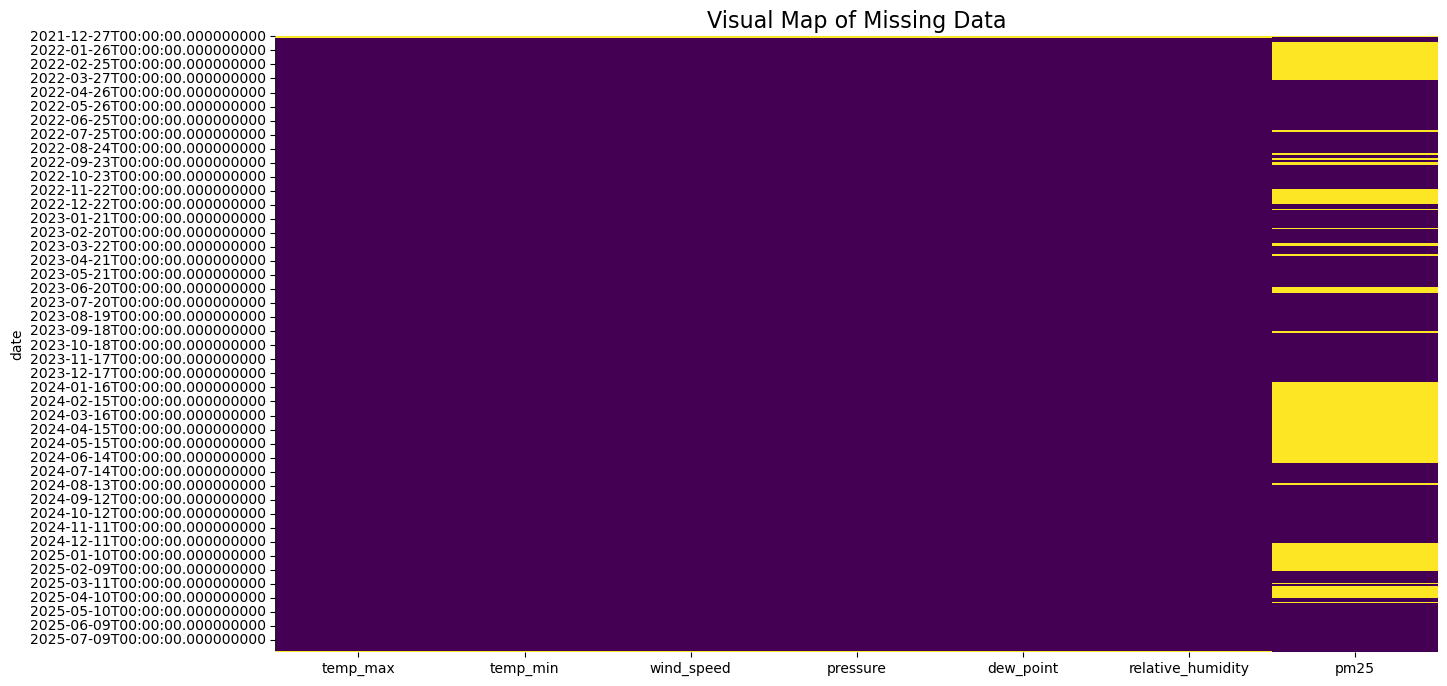

In [151]:
df_raw_merged.set_index('date', inplace=True)
df_raw_merged.sort_index(inplace=True)
plt.figure(figsize=(15,8))
sns.heatmap(df_raw_merged.isnull(), cbar=False, cmap='viridis')
plt.title('Visual Map of Missing Data', fontsize=16)
plt.show()

## Heatmap Analysis

1. The meteorological data is largely complete from the start of 2022 until early February 2025.

2. The PM2.5 data, however, show significant gaps and inconsistency after the end of 2024.

3. Therefore, the period from January 1, 2022, to December 31, 2023, is selected for this study, as it offers the best balance of data completeness across all features.

In [152]:
start_date = '2022-04-01'
end_date = '2023-12-31'
df_sliced = df_raw_merged.loc[start_date:end_date]

In [153]:
df_sliced.head()

,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity,pm25
date,,,,,,,
2022-04-01,29.4,20.0,5.2,956.2,19.8,73.0,64.0
2022-04-02,29.3,19.7,5.7,959.0,20.5,81.0,61.0
2022-04-03,28.6,21.3,4.5,956.5,19.1,72.0,54.0
2022-04-04,31.3,20.4,5.9,956.8,17.4,62.0,59.0
2022-04-05,32.9,20.7,6.4,959.0,16.4,55.0,59.0


In [154]:
df_sliced.describe()

,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity,pm25
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,560.000000
mean,28.188125,18.995469,5.084687,956.486719,17.365781,71.442188,60.382143
std,3.755474,5.236345,1.406530,4.626564,5.868419,13.767569,38.285207
min,17.100000,6.700000,2.500000,946.800000,2.000000,29.000000,4.000000
25%,25.800000,14.700000,4.100000,952.500000,12.175000,64.000000,29.000000
50%,28.900000,21.100000,4.800000,956.100000,18.350000,74.000000,55.000000
75%,30.700000,23.600000,5.800000,960.500000,23.200000,82.000000,82.000000
max,37.600000,26.200000,15.300000,966.400000,25.000000,96.000000,179.000000


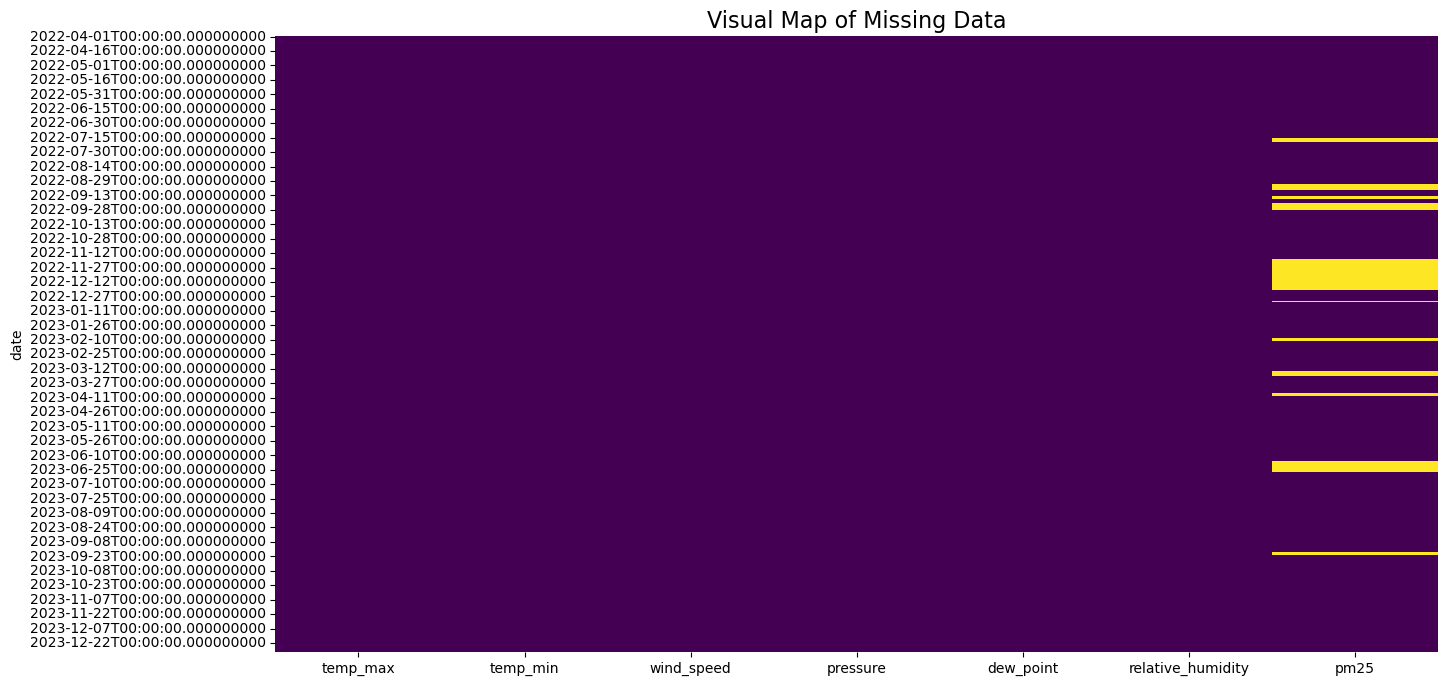

In [155]:
plt.figure(figsize=(15,8))
sns.heatmap(df_sliced.isnull(), cbar=False, cmap='viridis')
plt.title('Visual Map of Missing Data', fontsize=16)
plt.show()

### 4.2. Handling Remaining Missing Data
The sliced dataframe still has minor gaps in the `pm25` column. Time-based interpolation is used to fill these missing values, a method suitable for chronological data.

In [156]:
df_final = df_sliced.copy()

In [157]:
df_final['pm25'] = df_final['pm25'].interpolate(method='time').round(2)

In [158]:
df_final.count()

temp_max             640
temp_min             640
wind_speed           640
pressure             640
dew_point            640
relative_humidity    640
pm25                 640
dtype: int64

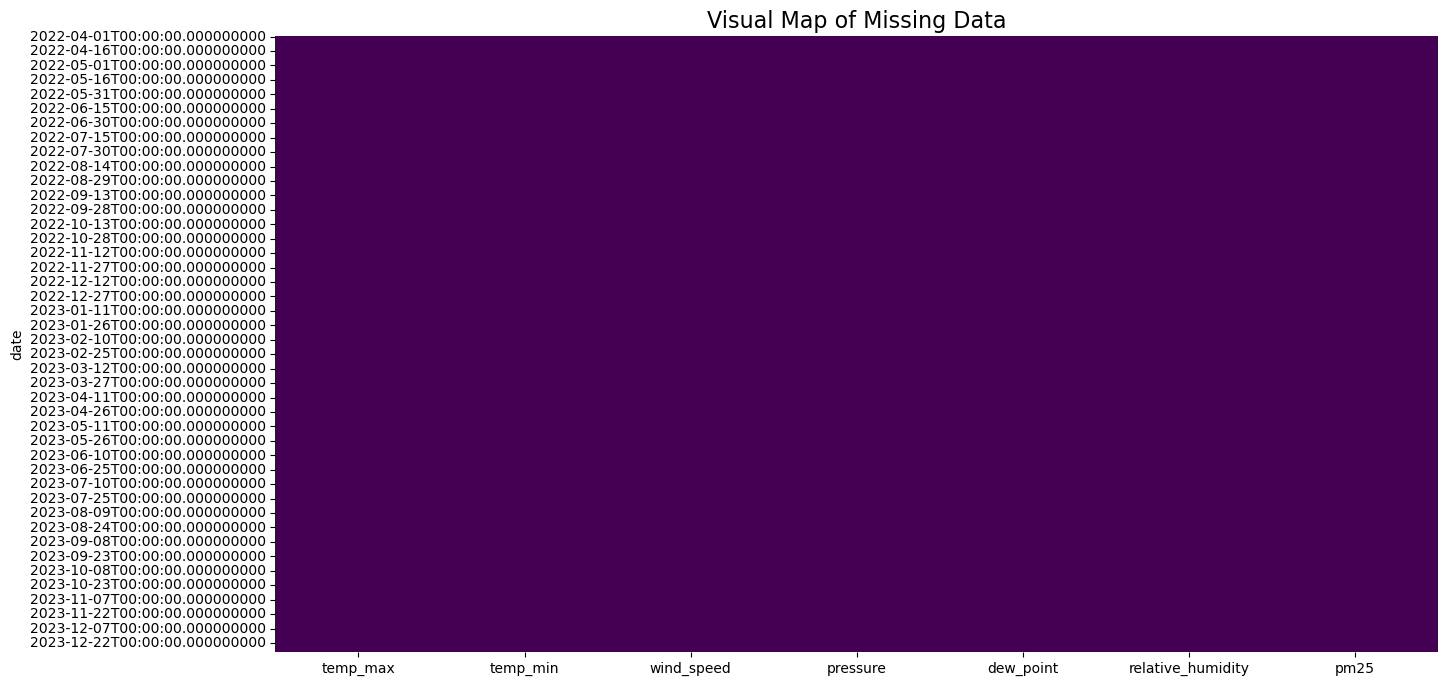

In [159]:
plt.figure(figsize=(15,8))
sns.heatmap(df_final.isnull(), cbar=False, cmap='viridis')
plt.title('Visual Map of Missing Data', fontsize=16)
plt.show()

In [160]:
df_final.describe()

,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity,pm25
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,28.188125,18.995469,5.084687,956.486719,17.365781,71.442188,59.735937
std,3.755474,5.236345,1.406530,4.626564,5.868419,13.767569,37.172540
min,17.100000,6.700000,2.500000,946.800000,2.000000,29.000000,4.000000
25%,25.800000,14.700000,4.100000,952.500000,12.175000,64.000000,28.000000
50%,28.900000,21.100000,4.800000,956.100000,18.350000,74.000000,56.000000
75%,30.700000,23.600000,5.800000,960.500000,23.200000,82.000000,80.015000
max,37.600000,26.200000,15.300000,966.400000,25.000000,96.000000,179.000000


In [161]:
df_final.to_csv('../data/processed/hetauda-cleaned.csv')

In [162]:
print(df_final.isnull().sum())

temp_max             0
temp_min             0
wind_speed           0
pressure             0
dew_point            0
relative_humidity    0
pm25                 0
dtype: int64


In [163]:
print("Total number of Duplicated values:", df_final.duplicated().sum())

Total number of Duplicated values: 0


In [164]:
df_final.columns

Index(['temp_max', 'temp_min', 'wind_speed', 'pressure', 'dew_point',
       'relative_humidity', 'pm25'],
      dtype='object')

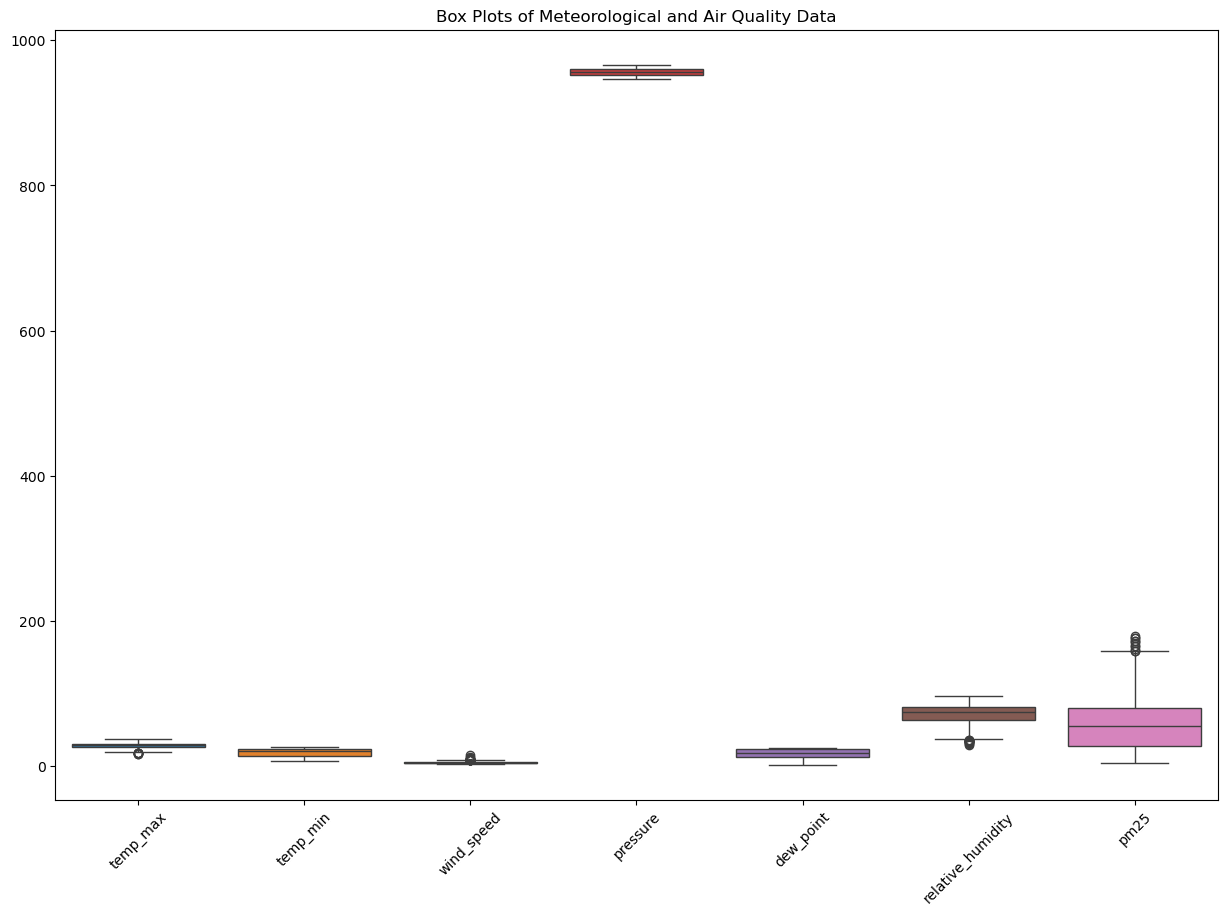

In [165]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_final)
plt.title('Box Plots of Meteorological and Air Quality Data')
plt.xticks(rotation=45)
plt.show()

### 4.3. Outlier Visualization
A box plot is used to visualize the distribution of each variable and identify any statistical outliers in the final cleaned dataset.